# Regression Trees

In [12]:
# install the package for visualizations
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 80.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 73.0 MB/s eta 0:00:01     |█████████████████████████████▋  | 14.2 MB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 56.5 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 821 kB 67.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 89.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 80.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 72.2 MB/s eta 0:00:01
ERROR: pip's dependency resolve

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

sns.set()
%matplotlib inline

In [2]:
auto_mpg = pd.read_csv('datasets/auto_mpg.csv')
print(auto_mpg.info())
auto_mpg.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB
None


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0


In [3]:
# check for missing or inappropriate values
non_missing_columns = auto_mpg.drop('origin', axis=1).columns
for col in non_missing_columns:
    missing = len(auto_mpg[auto_mpg[col] <= 0])
    if missing:
        print(f'Column {col} has {missing} missing columns')

# check for duplicates
print(auto_mpg[auto_mpg.duplicated()])

# display the duplications
print('\nShowing the duplications...')
print(auto_mpg[(auto_mpg['origin'] == 'Asia') & (auto_mpg['mpg'] == 27.0) & (auto_mpg['hp'] == 88) & (auto_mpg['accel'] == 14.5)])

      mpg  displ  hp  weight  accel origin  size
370  27.0   97.0  88    2130   14.5   Asia  10.0

Showing the duplications...
      mpg  displ  hp  weight  accel origin  size
158  27.0   97.0  88    2130   14.5   Asia  10.0
370  27.0   97.0  88    2130   14.5   Asia  10.0


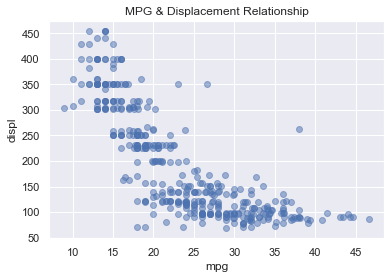

In [4]:
_ = plt.scatter(data=auto_mpg, x='mpg', y='displ', alpha=.5)
_ = plt.xlabel('mpg')
_ = plt.ylabel('displ')
_ = plt.title('MPG & Displacement Relationship')
plt.show()

In [7]:
auto_mpg.origin = auto_mpg.origin.astype('category')
auto_mpg.origin = auto_mpg.origin.cat.codes

X, y = auto_mpg.drop('size', axis=1), auto_mpg['size']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

dt = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
print(f'Test score: {dt.score(X_test, y_test)}')
print(f'Test MSE: {MSE(y_test, dt.predict(X_test))}')
print(f'Test RMSE: {np.sqrt(MSE(y_test, dt.predict(X_test)))}')

Test score: 0.9497523289600286
Test MSE: 0.8190868381425971
Test RMSE: 0.9050341640748139
